<figure>
  <IMG SRC="img/logo_ufaz.png" WIDTH=100 ALIGN="right">
</figure>

# Lab 2 : Fourier transform and spectrum
*Signal Processing in Geosciences / A. Maggi / Sept 2020* 

---------

This lab is intented to get used with 1) the Fourier transform, 2) the analysis of the amplitude spectrum and 3) to see that the frequency resolution is directly related to the duration of the dataset.

------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook

## 1. Timeseries of sunspots

We come back to the dataset of the average monthly number of sunspots given in the file `sunspots.dat`

We start by reading again the data  and plot the timeseries


Text(0.5, 1.0, 'timeseries of sunspots')

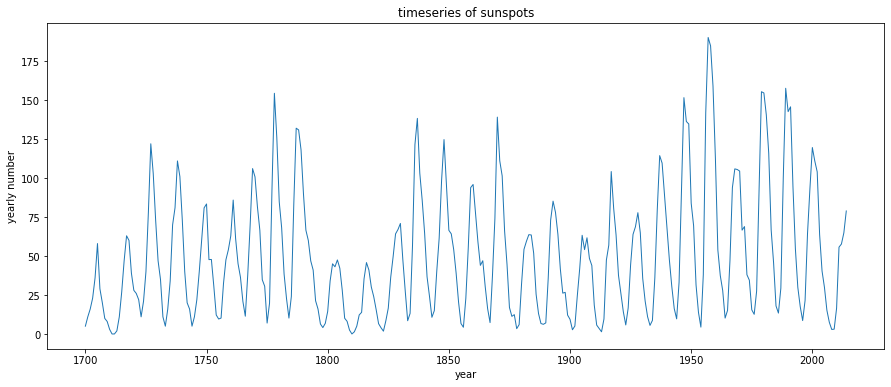

In [2]:
A = np.loadtxt('Data/sunspots.dat')
year = A[:,0]
spots = A[:,1]
plt.figure(figsize=(15,6))
plt.plot(year,spots,linewidth=1)
plt.xlabel('year');plt.ylabel('yearly number');plt.title('timeseries of sunspots')

We will now analyze this timeseries in the frequency domain.

All the useful tools to compute fourier transform of an array as located in the `fft`module of `numpy`

*fft* stands for *fast fourier transform*. 
It is an optimze numerical algorithm to compute the Fourier transform of a vector.

We will use the shortcut `fft` to avoid typing `np.` each time :


In [4]:
import numpy.fft as fft

To compute the Fourier transform of a an array `x`we just need to write 

`X = fft.fft(x)`

*Nota bene : We will try as possible to use lower-case variable names for the timeseries and the equivalent upper-case name for the Fourier transform*

We also check that the output is a complex vector and that it has the same number of elements as the timeseries


In [5]:
SPOTS = fft.fft(spots)
print(SPOTS)
print('number of elements in the time series :',len(spots))
print('number of elements in the fourier transform :',len(SPOTS))

[ 1.56479000e+04+0.00000000e+00j  8.44621347e+02+1.08968101e+03j
 -7.16562738e+02+1.38262827e+03j -2.42664594e+03+9.00461733e+02j
  6.18137924e+02+2.31413400e+02j -6.91783747e+02-7.60643093e+02j
 -1.30434917e+03+1.14975835e+03j -1.45466954e+02+8.25770050e+02j
 -4.78664167e+02-3.66293107e+02j  1.93974333e+02-1.83776055e+02j
  3.33319371e+02-2.23045670e+02j  7.17525229e+02+4.95009826e+02j
 -1.24943022e+02-2.89019552e+02j  3.50044868e+01+3.86508867e+02j
 -1.31053073e+02+1.30597010e+02j  1.85433620e+02-8.21671036e+02j
 -2.82452249e+01-1.25511207e+02j  4.83730525e+02-1.97690694e+02j
  2.65116511e+02+1.45012586e+02j -1.11375172e+01-6.96915064e+02j
 -2.07493003e+02-6.34429387e+01j  7.25775670e+02+3.42996833e+01j
  1.25323164e+02-6.09749282e+02j  9.69546043e+01+4.00378328e+02j
  9.30411596e+02+5.73756062e+02j  3.98293438e+02-6.20153202e+02j
  5.35589840e+02-1.72466683e+03j  4.17682757e+02+1.10618614e+03j
  1.12940808e+03-1.78463770e+03j -2.06821608e+02+3.70338155e+03j
 -2.83360492e+03+2.250217

We now want to plot the amplitude spectrum (`abs` in python) and phase spectrum (`angle` in python).

However we first need to know which frequency corresponds to each of the data points in the Fourier transform.

To do that we use the method `fft.fftfreq` which return an array of frequencies.

It requires 2 parameters : 
1. The length of the timeseries (which is also the length of its fourier transform)
2. the time step of the time time series ($dt$)

In [6]:
#fft.fftfreq?
dt = 1 # The time step in year
N = len(spots) # The number of points

f = fft.fftfreq(N,dt)

print(f)

[ 0.          0.0031746   0.00634921  0.00952381  0.01269841  0.01587302
  0.01904762  0.02222222  0.02539683  0.02857143  0.03174603  0.03492063
  0.03809524  0.04126984  0.04444444  0.04761905  0.05079365  0.05396825
  0.05714286  0.06031746  0.06349206  0.06666667  0.06984127  0.07301587
  0.07619048  0.07936508  0.08253968  0.08571429  0.08888889  0.09206349
  0.0952381   0.0984127   0.1015873   0.1047619   0.10793651  0.11111111
  0.11428571  0.11746032  0.12063492  0.12380952  0.12698413  0.13015873
  0.13333333  0.13650794  0.13968254  0.14285714  0.14603175  0.14920635
  0.15238095  0.15555556  0.15873016  0.16190476  0.16507937  0.16825397
  0.17142857  0.17460317  0.17777778  0.18095238  0.18412698  0.18730159
  0.19047619  0.19365079  0.1968254   0.2         0.2031746   0.20634921
  0.20952381  0.21269841  0.21587302  0.21904762  0.22222222  0.22539683
  0.22857143  0.23174603  0.23492063  0.23809524  0.24126984  0.24444444
  0.24761905  0.25079365  0.25396825  0.25714286  0

You can see that the frequency array is made of 2 parts :
* The first half for positive frequencies going from $0$ to $\approx 0.5 y^{-1}$ which is half of the sampling rate ($\frac{1}{2}.\frac{1}{dt}$)
* The second half for negative frequencies going from $\approx -0.5 y^{-1}$ to $0$

We will understand that a little bit later ...

We can now plot the amplitude and phase spectrum :

Text(0.5, 1.0, 'sunspots : phase spectrum')

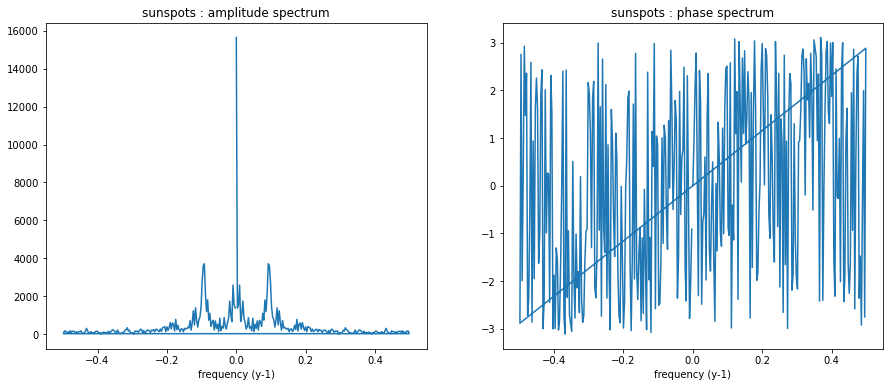

In [7]:
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(f,np.abs(SPOTS))
plt.xlabel('frequency (y-1)')
plt.title('sunspots : amplitude spectrum')

plt.subplot(122)
plt.plot(f,np.angle(SPOTS))
plt.xlabel('frequency (y-1)')
plt.title('sunspots : phase spectrum')

We see that :

1) There is a strong peak in the amplitude spectrum at frequency $f=0 y^{-1}$. It corresponds to the $a_0$ factor of the Fourier series which is directly related to the mean value of the timeseries. To avoid this peak we need to remove the mean of the timeseries before computing the Fourier transform with `fft.fft`

2) We see that the amplitude spectrum is symetric and that the phase spectrum is anti-symetric. This is because the timeseris is made of real values. As it will be always the case for the datasets we'll analyze we can restrict the plotting to only the positive frequencies by taking only the first half of the fourier transform and the frequency arrays. But remember that there is always a negative part in the spectra !!

Let's do these two improvements :

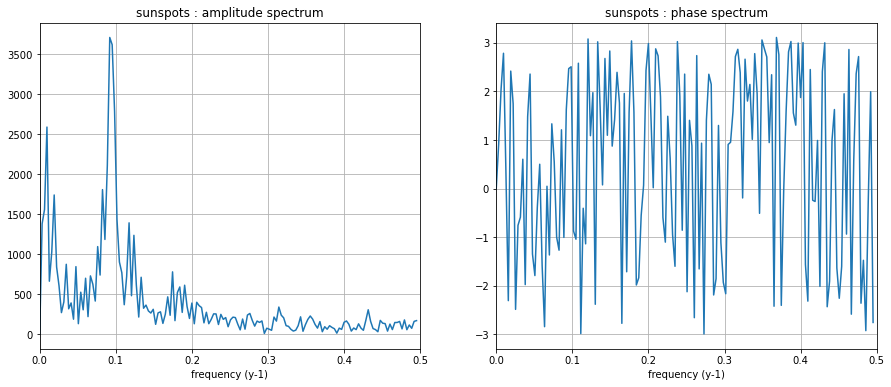

In [8]:
# Removing the mean of the timeseries
spots = spots - np.mean(spots)
# Computing the Fourier transform
SPOTS = fft.fft(spots)
f = fft.fftfreq(N,dt)

# Plotting the amplitude and phase spectrum with only the first part corresponding to positive frequencies
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(f[0:int(N/2)],np.abs(SPOTS[0:int(N/2)]))
plt.xlabel('frequency (y-1)')
plt.title('sunspots : amplitude spectrum')
plt.xlim((0,1/(2*dt)))
plt.grid()

plt.subplot(122)
plt.plot(f[0:int(N/2)],np.angle(SPOTS[0:int(N/2)]))
plt.xlabel('frequency (y-1)')
plt.title('sunspots : phase spectrum')
plt.xlim((0,1/(2*dt)))
plt.grid()

We can now quickly analyze the amplitude spectrum :

We see a major peak at $f \approx 0.9 y^{-1}$, correspond to a period $ T = \frac{1}{f} \approx 11$ years

It indicates that this frequency/period is strongly present in the timeseries.

*We can get a more precise value of this peak frequency with python functions `max` and `argmax`:*


In [9]:
amp_max = np.max(np.abs(SPOTS))
i_amp_max = np.argmax(np.abs(SPOTS))
fmax = f[i_amp_max]
print('max of amplitude spectrum is ',amp_max,' at frequency (y-1) :',fmax)

max of amplitude spectrum is  3709.152208754273  at frequency (y-1) : 0.09206349206349207


In other words, a first approximate of the timeseries is a cosinusoïd of frequency $f \approx 0.9 y^{-1}$ (you can take the value obtained just before).

We can check that by superposing the timeseries and such cosinusoïd.

To construct this cosinus function we need :
* it's frequency => $\approx 0.9 y^{-1}$
* it's phase => in the phase spectrum we need to extract what the value of the phase at this specific frequency
* it's amplitude => We take the amplitude of the peak in the amplitude spectrum, then multiply by 2 and divide by the number of samples in the timeseries *(it's a numpy convention)*

1.626585067781995


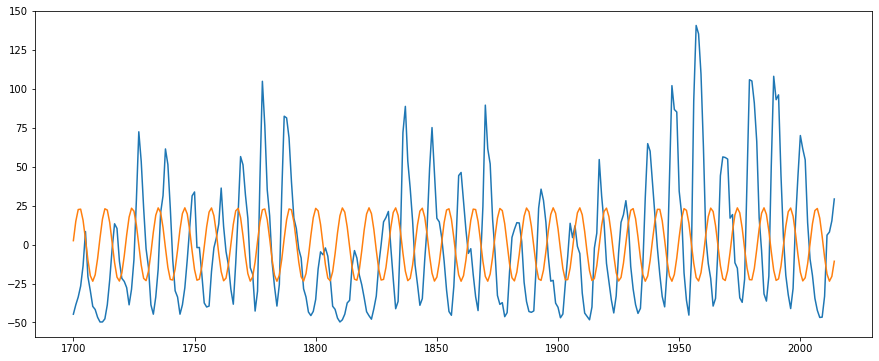

In [10]:
freq_cos = fmax
phase_cos = np.angle(SPOTS)[i_amp_max]
print(phase_cos)
amp_cos  = amp_max*2/len(spots)

s = amp_cos*np.cos(2*np.pi*freq_cos*year + phase_cos)

plt.figure(figsize=(15,6))
plt.plot(year,spots)
plt.plot(year,s)

We see that this cosinus function only roughly explain the timeseries.

This is because there are other frequencies in the amplitude spectrum !

What are the main other periodicity in the number of sunspots that you can see in the amplitude spectrum ?

## 2. Some other spectra

Following the same principle, it is now your turn to compute and plot the amplitude spectra of some other timeseries we saw during the first lab.

*NB : Usually the phase spectrum carries less "physical" information (than the amplitude spectrum) and is not plotted. However do not forget that the Fourier transform is complex series and that both amplitude and phase spectra exist ! Both are needed to go back from the frequency domain to the time domain*

### 2.1 Meteorological data

>To do :
* Read an plot again the time series of temperature, wind speed and pressure in Strasbourg during August 2014 from the file `weather_strasbourg_august.txt`
* Compute the Fourier transform and the corresponding frequency array
* Plot and try to interpret the amplitude spectra


Text(0.5, 0, 'frequency (h-1)')

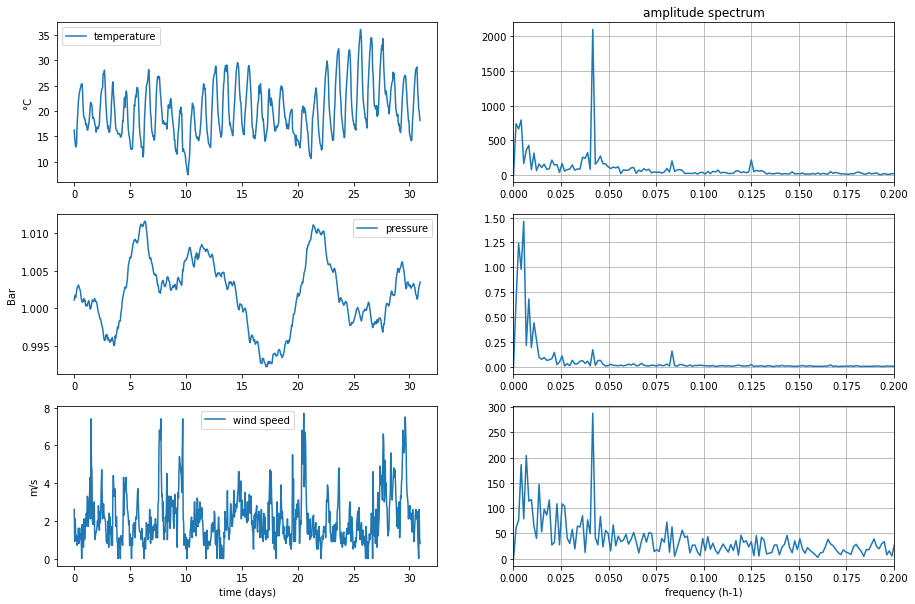

In [11]:
A = np.loadtxt('Data/weather_strasbourg_august.txt')

temp = A[:,0]-273
wind = A[:,1]
press = A[:,2]/1e5

dt = 1 # sampling in h
time = np.arange(0,len(temp))*dt
N = len(temp)

TEMP = fft.fft(temp-np.mean(temp))[0:int(N/2)]
WIND = fft.fft(wind-np.mean(wind))[0:int(N/2)]
PRESS = fft.fft(press-np.mean(press))[0:int(N/2)]
f = fft.fftfreq(N,dt)[0:int(N/2)]

plt.figure(figsize=(15,10))
plt.subplot(321)
plt.plot(time/24,temp,label='temperature')
plt.legend()
plt.ylabel('°C')
plt.subplot(322)
plt.plot(f,np.abs(TEMP))
plt.xlim((0,0.2))
plt.grid()
plt.title('amplitude spectrum')

plt.subplot(323)
plt.plot(time/24,press,label='pressure')
plt.legend()
plt.ylabel('Bar')
plt.subplot(324)
plt.plot(f,np.abs(PRESS))
plt.xlim((0,0.2))
plt.grid()

plt.subplot(325)
plt.plot(time/24,wind,label='wind speed')
plt.legend()
plt.ylabel('m/s')
plt.xlabel('time (days)')
plt.subplot(326)
plt.plot(f,np.abs(WIND))
plt.xlim((0,0.2))
plt.grid()
plt.xlabel('frequency (h-1)')


### 2.2 Seismogram

> To do:
* Read an plot again the seismogram from the file `seismogram.txt`
* Compute the Fourier transform and the corresponding frequency array
* Plot the amplitude spectrum but using a loglog scale (`plt.loglog`) instead of a linear scale (`plt.plot`) for the x and y acis
* *(optionnal) cut the trace around the P, the S and the surface waves and superpose their respective amplitude spectra (normalized by the number of points)*

Text(0.5, 0, 'frequency (Hz)')

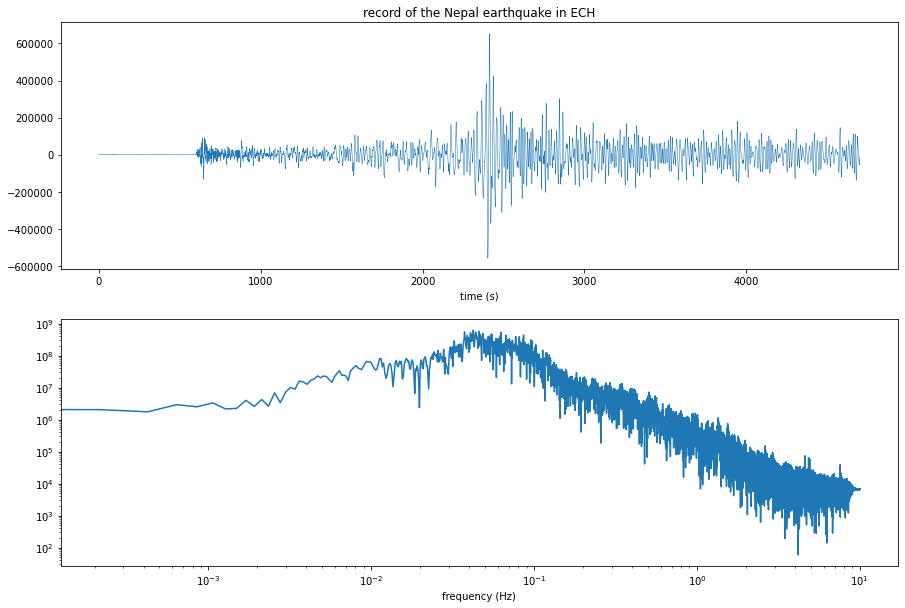

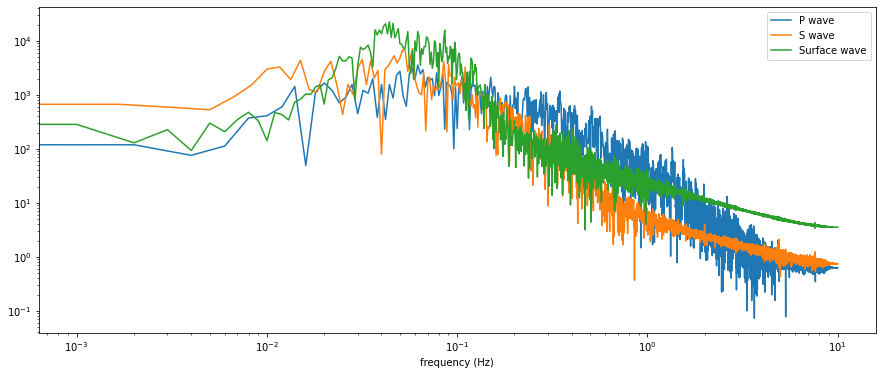

In [12]:
sismo = np.loadtxt('Data/seismogram.txt',comments="#")
dt = 1./20
N = len(sismo)
t = np.arange(0,N)*dt

SISMO = fft.fft(sismo)[0:int(N/2)]
f = fft.fftfreq(N,dt)[0:int(N/2)]

plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(t,sismo,linewidth=0.5)
plt.xlabel('time (s)')
plt.title('record of the Nepal earthquake in ECH')

plt.subplot(212)
plt.loglog(f,np.abs(SISMO))
plt.xlabel('frequency (Hz)')

# Spectra for various waves
# P waves
iw = np.all([t>500,t<1000],axis=0)
sismo_w = sismo[iw]
N = len(sismo_w)
SISMO_W = fft.fft(sismo_w)[0:int(N/2)]
f_w = fft.fftfreq(N,dt)[0:int(N/2)]

plt.figure(figsize=(15,6))
plt.loglog(f_w,np.abs(SISMO_W)/N,label='P wave')

# S waves
iw = np.all([t>1200,t<1800],axis=0)
sismo_w = sismo[iw]
N = len(sismo_w)
SISMO_W = fft.fft(sismo_w)[0:int(N/2)]
f_w = fft.fftfreq(N,dt)[0:int(N/2)]

plt.loglog(f_w,np.abs(SISMO_W)/N,label='S wave')

# Surface waves
iw = np.all([t>2000,t<3000],axis=0)
sismo_w = sismo[iw]
N = len(sismo_w)
SISMO_W = fft.fft(sismo_w)[0:int(N/2)]
f_w = fft.fftfreq(N,dt)[0:int(N/2)]

plt.loglog(f_w,np.abs(SISMO_W)/N,label='Surface wave')

plt.legend()
plt.xlabel('frequency (Hz)')




## 3. Gravity timeseries and  frequency resolution

We will now focus on the temporal variation of gravity measured in Strasbourg.
This timeseries is particulary rich and will allow use to discuss the frequency resolution of the amplitude spectrum

>To do :
* Read the `gravi.dat` file (1 point / hour) and plot the timeseries
* Compute the fourier transform and plot the amplitude spectrum in a log-log scale
* Show that this timeseries exibits the following periodicities : 12h, 24h, 28 days, half a year, 1 year
* What are the associated physical phenomena ?


Text(0.5, 1.0, 'gravity variation in Strasbourg')

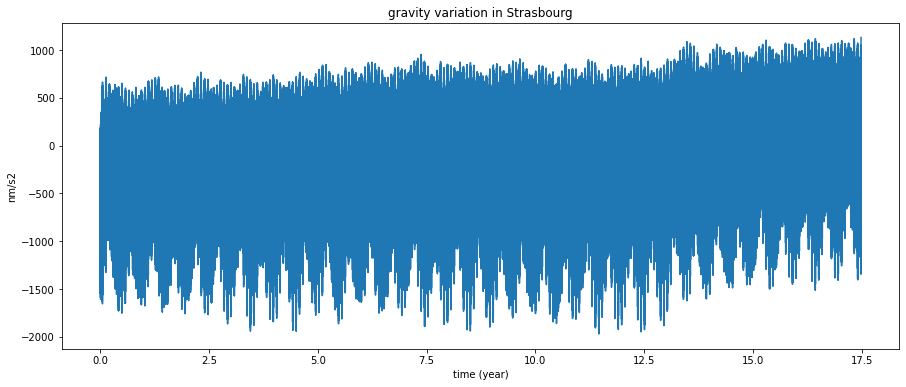

In [13]:
gravi = np.loadtxt('Data/gravi.dat')
dt = 1
N = len(gravi)
t = np.arange(0,N)*dt
gravi = gravi - np.mean(gravi)
plt.figure(figsize=(15,6))
plt.plot(t/(365.25*24),gravi)
plt.xlabel('time (year)')
plt.ylabel('nm/s2')
plt.title('gravity variation in Strasbourg')

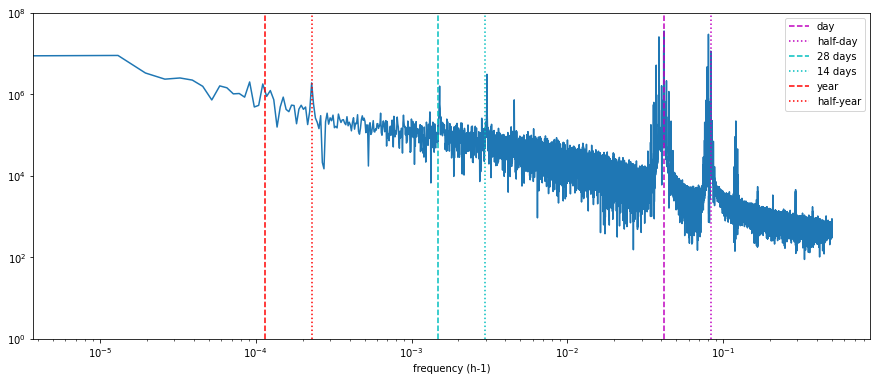

In [18]:
GRAVI = fft.fft(gravi)[0:int(N/2)]
f = fft.fftfreq(N,dt)[0:int(N/2)]

plt.figure(figsize=(15,6))
plt.loglog(f,np.abs(GRAVI))
plt.xlabel('frequency (h-1)')
plt.ylim((1,1e8))

plt.loglog([1/24,1/24],[1,1e8],'m--', label='day')
plt.loglog([2/24,2/24],[1,1e8],'m:', label='half-day')

#plt.loglog([1/(24+50/60),1/(24+50/60)],[1,1e8],'g--', label='day')
#plt.loglog([2/(24+50/60),2/(24+50/60)],[1,1e8],'g:', label='half-day')

plt.loglog([1/(24*28),1/(24*28)],[1,1e8],'c--', label='28 days')
plt.loglog([2/(24*28),2/(24*28)],[1,1e8],'c:', label='14 days')

plt.loglog([1/(24*365.25),1/(24*365.25)],[1,1e8],'r--', label='year')
plt.loglog([2/(24*365.25),2/(24*365.25)],[1,1e8],'r:', label='half-year')

plt.legend()

### 3.2 effect of observation duration  on frequency resolution

This timeseries is about 17.5 years long (one of the longest in the world) 

We will now simulate the effect of a shorter timeseries :

> To do :
* Plot again the amplitude spectrum for the whole dataset but in a linear-linear scale and zooming (with `plt.xlim`) in the frequency range [$0.07$ - $0.09$ $ h^{-1}$]. 
* See the two peaks associated with the periodicities 12h et 12h25min
* Create a new array with only the data for the first 30 days (we simulate a 30 days long recording)
* Compute and plot the corresponding amplitude spectrum
* Do you still see the 2 peaks associates to T=12h and T=12h25min ?
* Repeat the above procedure but keeping only 10 days of signal

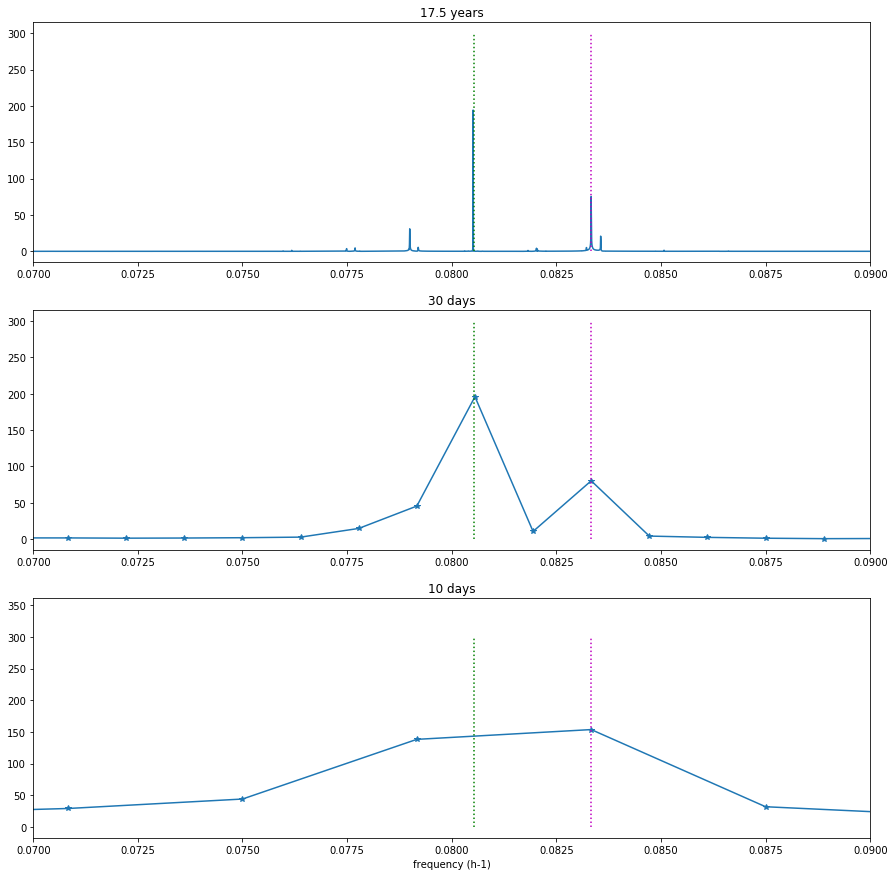

In [14]:
N = len(gravi)
GRAVI = fft.fft(gravi)[0:int(N/2)]
f = fft.fftfreq(N,dt)[0:int(N/2)]

plt.figure(figsize=(15,15))
plt.subplot(311)
plt.plot(f,np.abs(GRAVI)/N)
plt.title('17.5 years')
plt.xlim((0.07,0.09))
plt.plot([2/24,2/24],[0,300],'m:')
plt.plot([2/(24+50/60),2/(24+50/60)],[0,300],'g:')

gravi_30days = gravi[0:30*24]
N = len(gravi_30days)
GRAVI_30DAYS = fft.fft(gravi_30days)[0:int(N/2)]
f = fft.fftfreq(N,dt)[0:int(N/2)]

plt.subplot(312)
plt.plot(f,np.abs(GRAVI_30DAYS)/N,'*-')
plt.title('30 days')
plt.xlim((0.07,0.09))
plt.plot([2/24,2/24],[0,300],'m:')
plt.plot([2/(24+50/60),2/(24+50/60)],[0,300],'g:')

gravi_10days = gravi[0:10*24]
N = len(gravi_10days)
GRAVI_10DAYS = fft.fft(gravi_10days)[0:int(N/2)]
f = fft.fftfreq(N,dt)[0:int(N/2)]

plt.subplot(313)
plt.plot(f,np.abs(GRAVI_10DAYS)/N,'*-')
plt.xlabel('frequency (h-1)')
plt.title('10 days')
plt.xlim((0.07,0.09))
plt.plot([2/24,2/24],[0,300],'m:')
plt.plot([2/(24+50/60),2/(24+50/60)],[0,300],'g:')


This example shows that the only parameter that affects the frequency resolution is the duration of the signal (not the time step for example).

The longer you observe, the more you are able to seperate two close frequencies in a signal

**The spectral resolution  is $\Delta f = \frac{1}{T}$ where $T$ is the duration of your observations**



### 3.3 Zero padding 

Since the spectral resolution is inversely proportional to the duration of the signal, one can think that by adding arbitrary values to the end of datasets we can artificially extend the length of the dataset and therefore improve the spectral resolution.

Adding zeros ($0$) at the end of some data is called **zero padding**

An easy way to implement a zero padding is to use the optionnal parameter `n=` of `fft.fft` to specify the number of points of the fourier transform.

The help message from `fft.fft` states : 
*"If `n` is smaller than the length of the input, the input is cropped. If it is larger, the input is **padded with zeros**"*

We will test this option to see that it will allow use to improve the **accuracy** but **NOT the resolution**

>To do :
* Repeat the previous procedure (keeping only 30 days and only 10 days) but use the `n=` option of `fft.fft` with the number of points of the initial datasets
* Can you observe the two peaks for periodicities 12h and 12h25min for the 10-days long datasets ?
* Explain the difference between *accuracy* and *resolution*

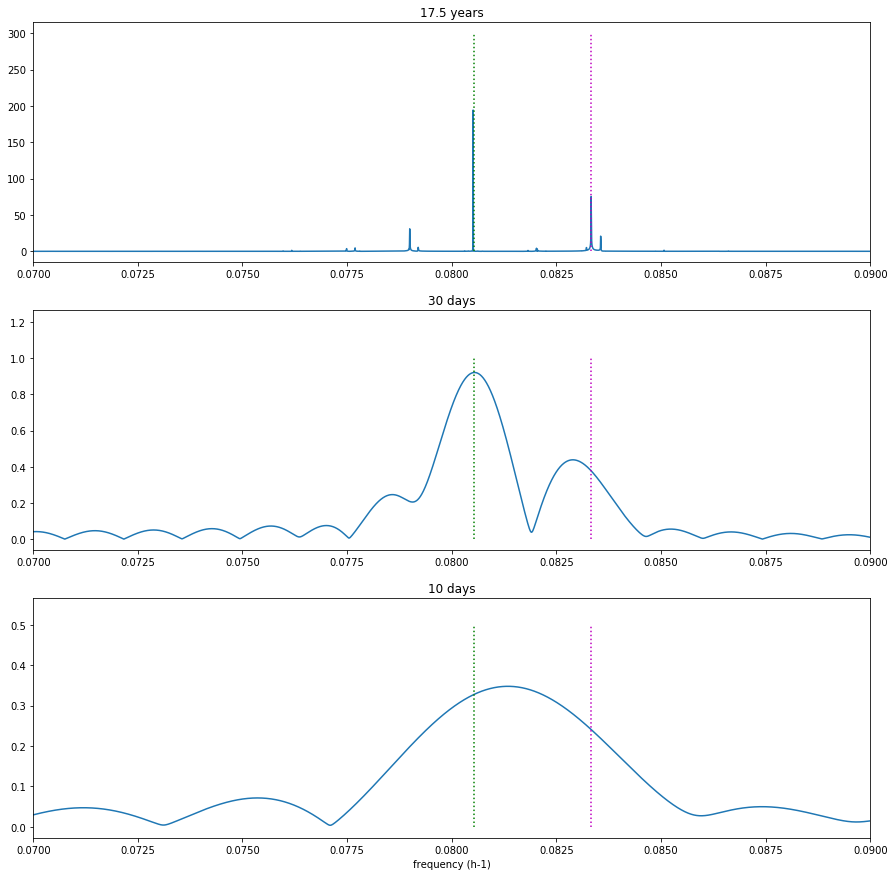

In [15]:
N = len(gravi)
GRAVI = fft.fft(gravi)[0:int(N/2)]
f = fft.fftfreq(N,dt)[0:int(N/2)]

plt.figure(figsize=(15,15))
plt.subplot(311)
plt.plot(f,np.abs(GRAVI)/N)
plt.title('17.5 years')
plt.xlim((0.07,0.09))
plt.plot([2/24,2/24],[0,300],'m:')
plt.plot([2/(24+50/60),2/(24+50/60)],[0,300],'g:')

gravi_30days = gravi[0:30*24]
GRAVI_30DAYS = fft.fft(gravi_30days,N)[0:int(N/2)]
f = fft.fftfreq(N,dt)[0:int(N/2)]

plt.subplot(312)
plt.plot(f,np.abs(GRAVI_30DAYS)/N)
plt.title('30 days')
plt.xlim((0.07,0.09))
plt.plot([2/24,2/24],[0,1],'m:')
plt.plot([2/(24+50/60),2/(24+50/60)],[0,1],'g:')

gravi_10days = gravi[0:10*24]
GRAVI_10DAYS = fft.fft(gravi_10days,N)[0:int(N/2)]
f = fft.fftfreq(N,dt)[0:int(N/2)]

plt.subplot(313)
plt.plot(f,np.abs(GRAVI_10DAYS)/N)
plt.xlabel('frequency (h-1)')
plt.title('10 days')
plt.xlim((0.07,0.09))
plt.plot([2/24,2/24],[0,.5],'m:')
plt.plot([2/(24+50/60),2/(24+50/60)],[0,.5],'g:')

You should see that the *zero padding*  :
* Do not increase the resolution (eg. ability to separate two frequencies in the spectrum)
* Introduces artefacts ("bumps" in the amplitude spectrum) due to the $sinc$ effect of windowing the data.

Therefore it is **dangerous to use** it if you don't know the effects.